<a href="https://colab.research.google.com/github/dataplusplus-ai/EVA7/blob/main/Advanced_Training_Concpts/Advanced_Training_Concepts_CIFAR10_Image_Classification_Resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-obcgh3g6
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-obcgh3g6
     |████████████████████████████████| 47.6 MB 2.6 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=103681 sha256=7ba9660c35e234d19660f8976b3af7c943f4f7291203f26e2d87110a7052f549
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ldmqjiz/wheels/09/5b/e0/38cb85186b3cb979092395de69893163f9a223a72066123599
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!git clone https://github.com/dataplusplus-ai/torch_cv_wrapper.git

Cloning into 'torch_cv_wrapper'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 126 (delta 58), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (126/126), 41.54 KiB | 348.00 KiB/s, done.
Resolving deltas: 100% (58/58), done.


In [3]:
from __future__ import print_function
import torchvision
import torch
from pprint import pprint
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

## Import Custom Libraries
from torch_cv_wrapper.utils import plot_metrics,train,test,helper
from torch_cv_wrapper.utils.gradcam import generate_gradcam, plot_gradcam
from torch_cv_wrapper.model import resnet
#from torch_cv_wrapper.main import FindImage

In [4]:
! pip install torch_lr_finder 
from torch_lr_finder import LRFinder

In [5]:
from torch_cv_wrapper.main import FindImage

## Load config file

In [6]:
#config = helper.process_config("/content/drive/MyDrive/Cifar10_Resnet/session8_assignment/config_session8_lateassignment.yaml")
config= helper.process_config('/content/config.yaml') 
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'type': 'CIFAR10Albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                             'truck'],
                 'type': 'Cifar10DataLoader'},
 'lr_scheduler': 'OneCycleLR',
 'model': 'Resnet18',
 'model_params': {'dropout': 0.05,
                  'experiment_name': 'cifar10_with_resnet18',
                  'model_dir': './model/',
                  'seed': 1},
 'optimizer': {'args': {'lr': 0.01}, 'type': 'optim.Adam'},
 'training_params': {'epochs

## Create Training Instance

In [7]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']
trigger_training=FindImage(config)

## Download data and view sample images

In [8]:
classes= config['data_loader']['classes']

#Get dataloaders
train_loader,test_loader = trigger_training.dataloader()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


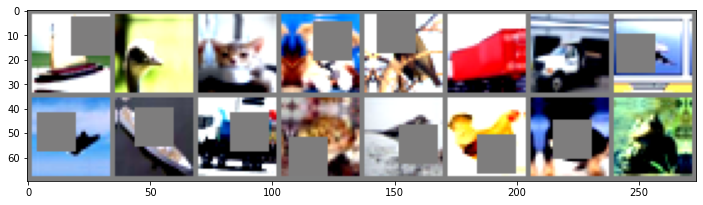

In [9]:
# get some random training images
images, labels = iter(train_loader).next()

# # show images
helper.imshow(torchvision.utils.make_grid(images[:16]))

## Model Summary

In [10]:
model = resnet.ResNet18("LN")
model.to(device)
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
        GroupNorm-14          [-1, 128,

## Trigger training

In [11]:
# trigger_training.
(exp_metrics[experiment_name]) = trigger_training.run_experiment(model,train_loader,test_loader)
trigger_training.save_experiment(model,experiment_name,"/content/saved_models")

Epoch 1:


Loss=1.873496651649475 Batch_id=195 LR=0.00056 Accuracy=21.44: 100%|██████████| 196/196 [06:32<00:00,  2.00s/it]



Test set: Average loss: 0.0076, Accuracy: 3166/10000 (31.66%)

Epoch 2:


Loss=1.7213255167007446 Batch_id=195 LR=0.00104 Accuracy=30.80: 100%|██████████| 196/196 [06:35<00:00,  2.02s/it]



Test set: Average loss: 0.0067, Accuracy: 3788/10000 (37.88%)

Epoch 3:


Loss=1.6330735683441162 Batch_id=195 LR=0.00181 Accuracy=38.21: 100%|██████████| 196/196 [06:35<00:00,  2.02s/it]



Test set: Average loss: 0.0061, Accuracy: 4441/10000 (44.41%)

Epoch 4:


Loss=1.3188751935958862 Batch_id=195 LR=0.00280 Accuracy=42.23: 100%|██████████| 196/196 [06:35<00:00,  2.02s/it]



Test set: Average loss: 0.0054, Accuracy: 5114/10000 (51.14%)

Epoch 5:


Loss=1.6996406316757202 Batch_id=195 LR=0.00396 Accuracy=45.33: 100%|██████████| 196/196 [06:35<00:00,  2.02s/it]



Test set: Average loss: 0.0054, Accuracy: 5143/10000 (51.43%)

Epoch 6:


Loss=1.6316936016082764 Batch_id=195 LR=0.00520 Accuracy=47.72: 100%|██████████| 196/196 [06:34<00:00,  2.01s/it]



Test set: Average loss: 0.0054, Accuracy: 5076/10000 (50.76%)

Epoch 7:


Loss=1.2346127033233643 Batch_id=195 LR=0.00645 Accuracy=50.17: 100%|██████████| 196/196 [06:34<00:00,  2.01s/it]



Test set: Average loss: 0.0049, Accuracy: 5591/10000 (55.91%)

Epoch 8:


Loss=1.1095887422561646 Batch_id=195 LR=0.00760 Accuracy=52.37: 100%|██████████| 196/196 [06:34<00:00,  2.01s/it]



Test set: Average loss: 0.0055, Accuracy: 5143/10000 (51.43%)

Epoch 9:


Loss=1.1990153789520264 Batch_id=195 LR=0.00860 Accuracy=55.25: 100%|██████████| 196/196 [06:33<00:00,  2.01s/it]



Test set: Average loss: 0.0042, Accuracy: 6227/10000 (62.27%)

Epoch 10:


Loss=1.169809103012085 Batch_id=195 LR=0.00936 Accuracy=56.50: 100%|██████████| 196/196 [06:33<00:00,  2.01s/it]



Test set: Average loss: 0.0046, Accuracy: 5963/10000 (59.63%)

Epoch 11:


Loss=1.3319975137710571 Batch_id=195 LR=0.00984 Accuracy=58.57: 100%|██████████| 196/196 [06:32<00:00,  2.00s/it]



Test set: Average loss: 0.0048, Accuracy: 5786/10000 (57.86%)

Epoch 12:


Loss=1.2538343667984009 Batch_id=195 LR=0.01000 Accuracy=60.44: 100%|██████████| 196/196 [06:32<00:00,  2.00s/it]



Test set: Average loss: 0.0038, Accuracy: 6723/10000 (67.23%)

Epoch 13:


Loss=1.0966038703918457 Batch_id=195 LR=0.00997 Accuracy=62.06: 100%|██████████| 196/196 [06:32<00:00,  2.00s/it]



Test set: Average loss: 0.0035, Accuracy: 6939/10000 (69.39%)

Epoch 14:


Loss=0.9966195225715637 Batch_id=195 LR=0.00987 Accuracy=63.27: 100%|██████████| 196/196 [06:32<00:00,  2.00s/it]



Test set: Average loss: 0.0038, Accuracy: 6498/10000 (64.98%)

Epoch 15:


Loss=0.9432469606399536 Batch_id=195 LR=0.00972 Accuracy=64.64: 100%|██████████| 196/196 [06:32<00:00,  2.00s/it]



Test set: Average loss: 0.0044, Accuracy: 6210/10000 (62.10%)

Epoch 16:


Loss=1.060189962387085 Batch_id=195 LR=0.00950 Accuracy=65.54: 100%|██████████| 196/196 [06:30<00:00,  1.99s/it]



Test set: Average loss: 0.0039, Accuracy: 6620/10000 (66.20%)

Epoch 17:


Loss=1.0279743671417236 Batch_id=195 LR=0.00923 Accuracy=66.44: 100%|██████████| 196/196 [06:30<00:00,  1.99s/it]



Test set: Average loss: 0.0034, Accuracy: 7054/10000 (70.54%)

Epoch 18:


Loss=0.8961032629013062 Batch_id=195 LR=0.00891 Accuracy=67.57: 100%|██████████| 196/196 [06:30<00:00,  1.99s/it]



Test set: Average loss: 0.0029, Accuracy: 7434/10000 (74.34%)

Epoch 19:


Loss=0.7894026041030884 Batch_id=195 LR=0.00853 Accuracy=68.46: 100%|██████████| 196/196 [06:29<00:00,  1.99s/it]



Test set: Average loss: 0.0029, Accuracy: 7568/10000 (75.68%)

Epoch 20:


Loss=0.701093316078186 Batch_id=195 LR=0.00812 Accuracy=70.29: 100%|██████████| 196/196 [06:29<00:00,  1.99s/it]



Test set: Average loss: 0.0029, Accuracy: 7442/10000 (74.42%)

Epoch 21:


Loss=0.8827165365219116 Batch_id=195 LR=0.00766 Accuracy=71.07: 100%|██████████| 196/196 [06:26<00:00,  1.97s/it]



Test set: Average loss: 0.0026, Accuracy: 7705/10000 (77.05%)

Epoch 22:


Loss=0.666235625743866 Batch_id=195 LR=0.00717 Accuracy=71.88: 100%|██████████| 196/196 [06:27<00:00,  1.98s/it]



Test set: Average loss: 0.0031, Accuracy: 7315/10000 (73.15%)

Epoch 23:


Loss=0.9318187832832336 Batch_id=195 LR=0.00665 Accuracy=73.24: 100%|██████████| 196/196 [06:26<00:00,  1.97s/it]



Test set: Average loss: 0.0026, Accuracy: 7820/10000 (78.20%)

Epoch 24:


Loss=0.5445255637168884 Batch_id=195 LR=0.00611 Accuracy=73.78: 100%|██████████| 196/196 [06:29<00:00,  1.99s/it]



Test set: Average loss: 0.0027, Accuracy: 7680/10000 (76.80%)

Epoch 25:


Loss=0.8289301991462708 Batch_id=195 LR=0.00556 Accuracy=74.68: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0024, Accuracy: 7947/10000 (79.47%)

Epoch 26:


Loss=0.7341095209121704 Batch_id=195 LR=0.00500 Accuracy=75.46: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0022, Accuracy: 8059/10000 (80.59%)

Epoch 27:


Loss=0.77024906873703 Batch_id=195 LR=0.00444 Accuracy=75.87: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0023, Accuracy: 8044/10000 (80.44%)

Epoch 28:


Loss=0.6151829957962036 Batch_id=195 LR=0.00388 Accuracy=77.13: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0023, Accuracy: 8007/10000 (80.07%)

Epoch 29:


Loss=0.534254252910614 Batch_id=195 LR=0.00335 Accuracy=77.78: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0020, Accuracy: 8260/10000 (82.60%)

Epoch 30:


Loss=0.6952883005142212 Batch_id=195 LR=0.00283 Accuracy=78.48: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0020, Accuracy: 8246/10000 (82.46%)

Epoch 31:


Loss=0.5898899435997009 Batch_id=195 LR=0.00234 Accuracy=79.46: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0020, Accuracy: 8309/10000 (83.09%)

Epoch 32:


Loss=0.6806079149246216 Batch_id=195 LR=0.00188 Accuracy=80.29: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0020, Accuracy: 8287/10000 (82.87%)

Epoch 33:


Loss=0.4209621846675873 Batch_id=195 LR=0.00146 Accuracy=80.99: 100%|██████████| 196/196 [06:29<00:00,  1.99s/it]



Test set: Average loss: 0.0019, Accuracy: 8439/10000 (84.39%)

Epoch 34:


Loss=0.535122275352478 Batch_id=195 LR=0.00109 Accuracy=81.64: 100%|██████████| 196/196 [06:29<00:00,  1.99s/it]



Test set: Average loss: 0.0018, Accuracy: 8544/10000 (85.44%)

Epoch 35:


Loss=0.4303179383277893 Batch_id=195 LR=0.00076 Accuracy=82.44: 100%|██████████| 196/196 [06:31<00:00,  2.00s/it]



Test set: Average loss: 0.0017, Accuracy: 8496/10000 (84.96%)

Epoch 36:


Loss=0.42171064019203186 Batch_id=195 LR=0.00049 Accuracy=83.04: 100%|██████████| 196/196 [06:29<00:00,  1.99s/it]



Test set: Average loss: 0.0017, Accuracy: 8571/10000 (85.71%)

Epoch 37:


Loss=0.43836545944213867 Batch_id=195 LR=0.00028 Accuracy=83.66: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0017, Accuracy: 8573/10000 (85.73%)

Epoch 38:


Loss=0.48999953269958496 Batch_id=195 LR=0.00012 Accuracy=83.98: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0017, Accuracy: 8605/10000 (86.05%)

Epoch 39:


Loss=0.2924918532371521 Batch_id=195 LR=0.00003 Accuracy=83.96: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0016, Accuracy: 8611/10000 (86.11%)

Epoch 40:


Loss=0.42605534195899963 Batch_id=195 LR=0.00000 Accuracy=84.39: 100%|██████████| 196/196 [06:28<00:00,  1.98s/it]



Test set: Average loss: 0.0016, Accuracy: 8611/10000 (86.11%)

Saving the model for cifar10_with_resnet18


## Missclassification

Total wrong predictions are 1389
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


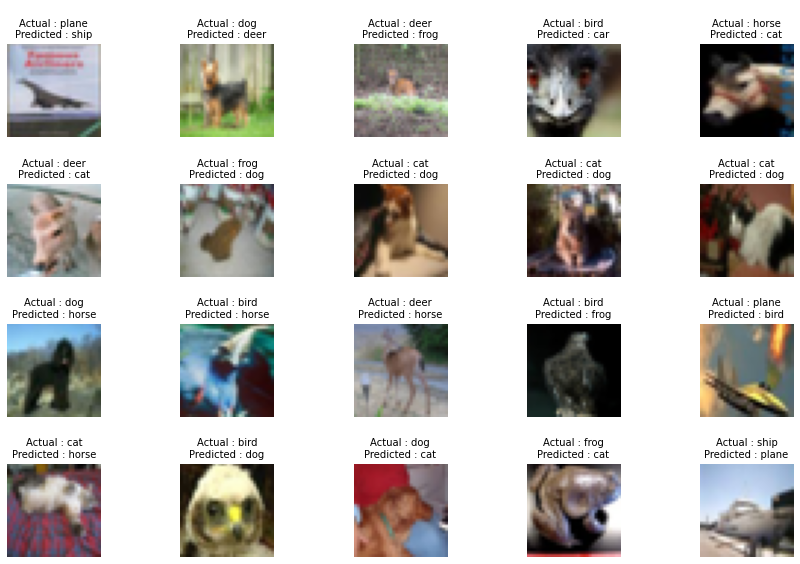

In [13]:
misclassified_images = trigger_training.wrong_predictions(model,test_loader,num_img=20)

## Plots for Validation Loss and Accuracy

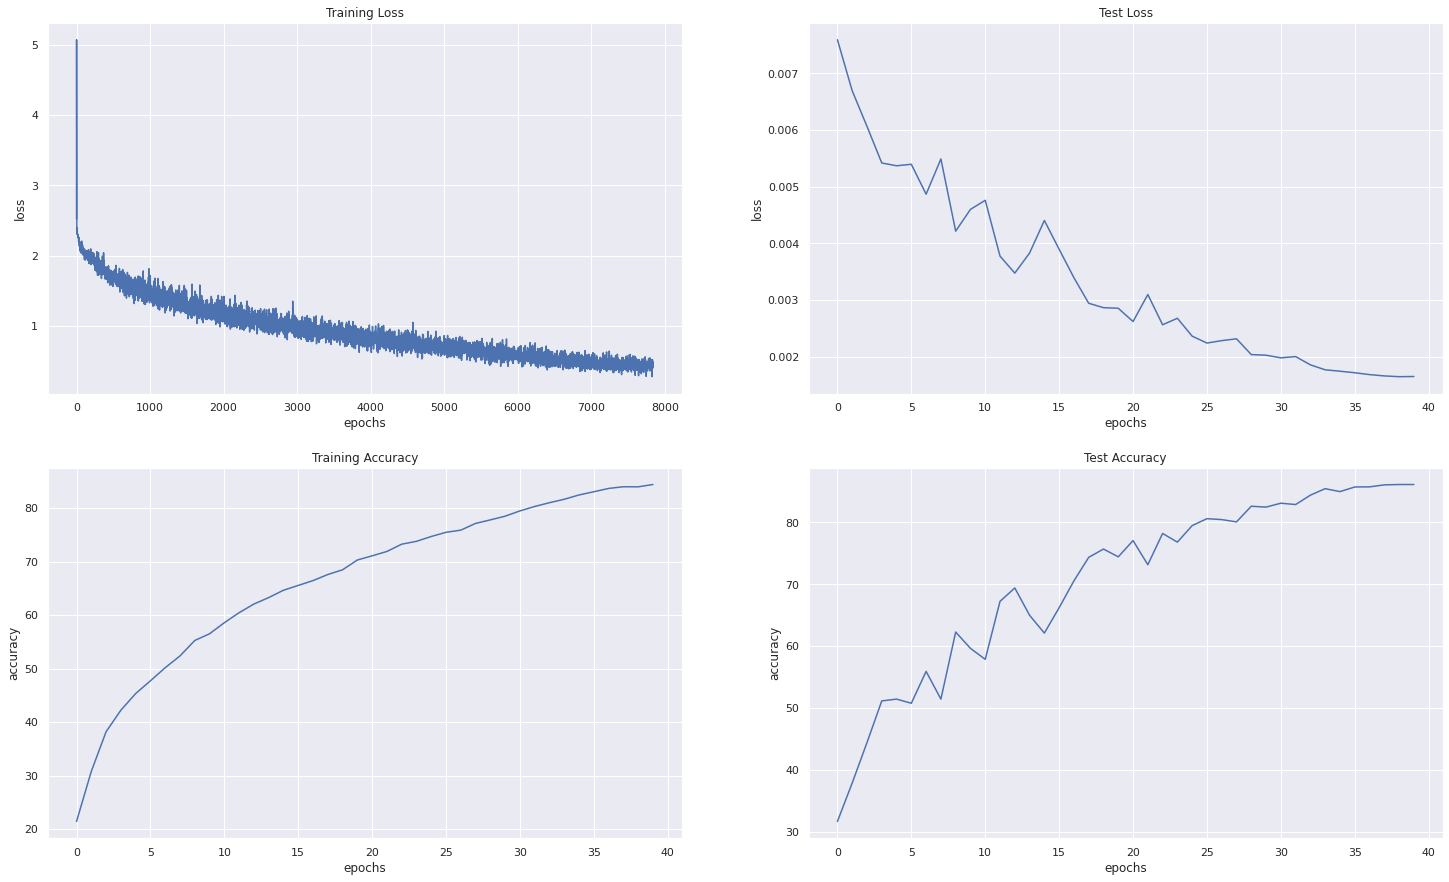

In [14]:
plot_metrics.plot_metrics(exp_metrics[experiment_name])

## Accuracy for each class

In [15]:
helper.class_level_accuracy(model, test_loader, device, classes)

Accuracy of plane : 88 %
Accuracy of   car : 94 %
Accuracy of  bird : 79 %
Accuracy of   cat : 69 %
Accuracy of  deer : 85 %
Accuracy of   dog : 79 %
Accuracy of  frog : 91 %
Accuracy of horse : 90 %
Accuracy of  ship : 91 %
Accuracy of truck : 90 %


## Plot Confusion Matrix

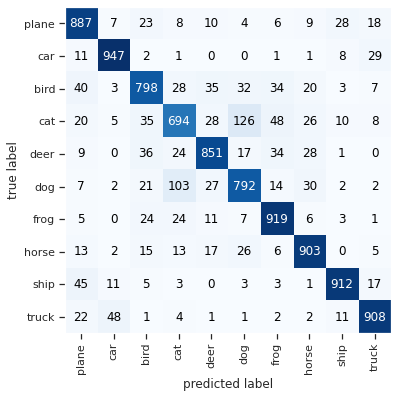

In [16]:
mat = helper.compute_confusion_matrix(model,test_loader,device)
plot_metrics.plot_confusion_matrix(mat, class_names=classes)


## Generate & Plot GradCam Images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


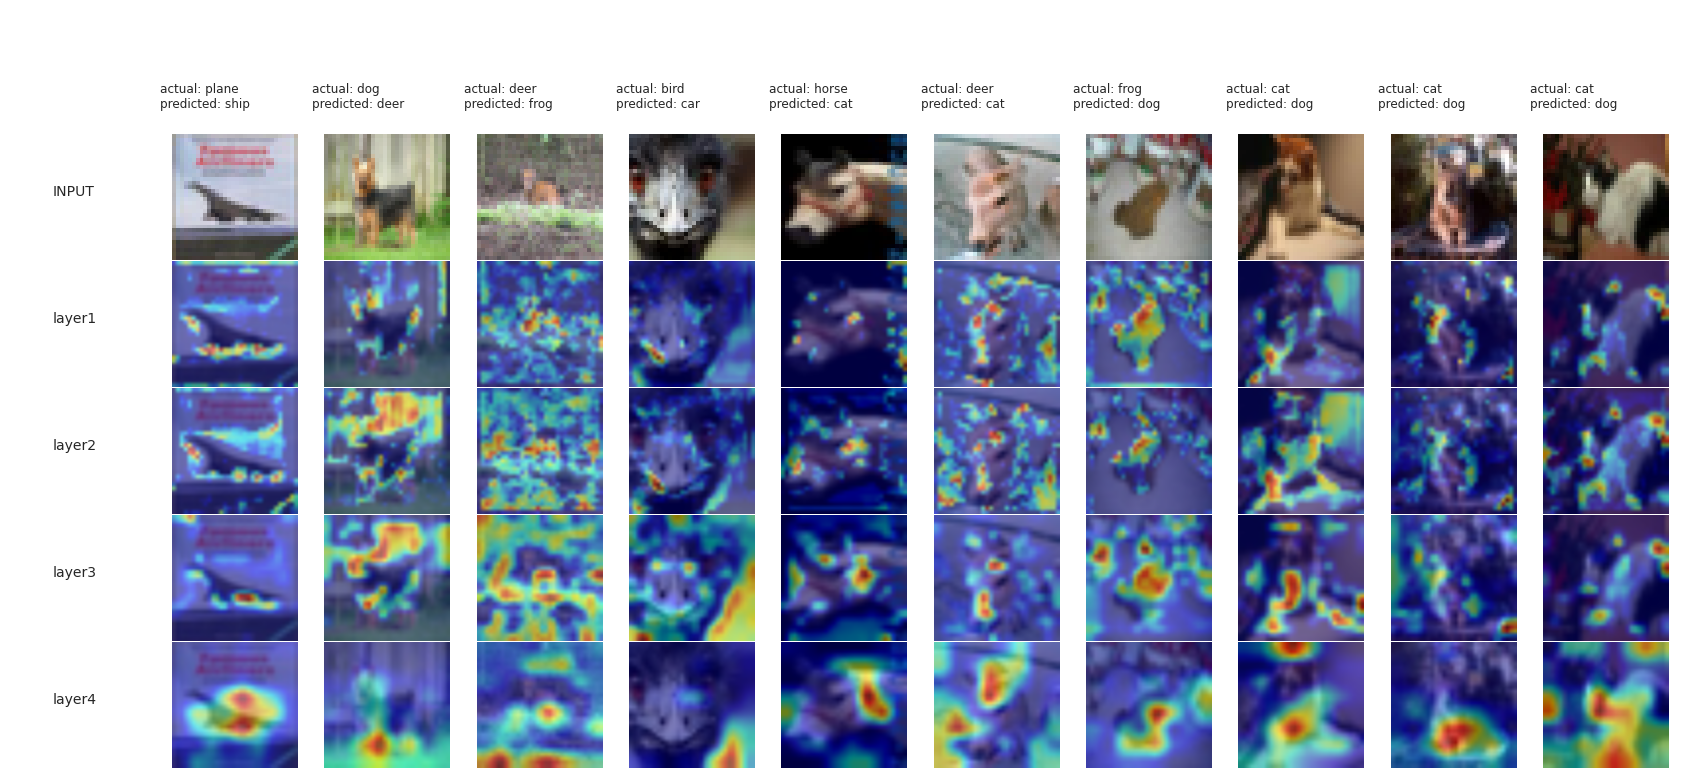

In [17]:
target_layers = ["layer1","layer2","layer3","layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[:10], model, target_layers,device)
plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[:10])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


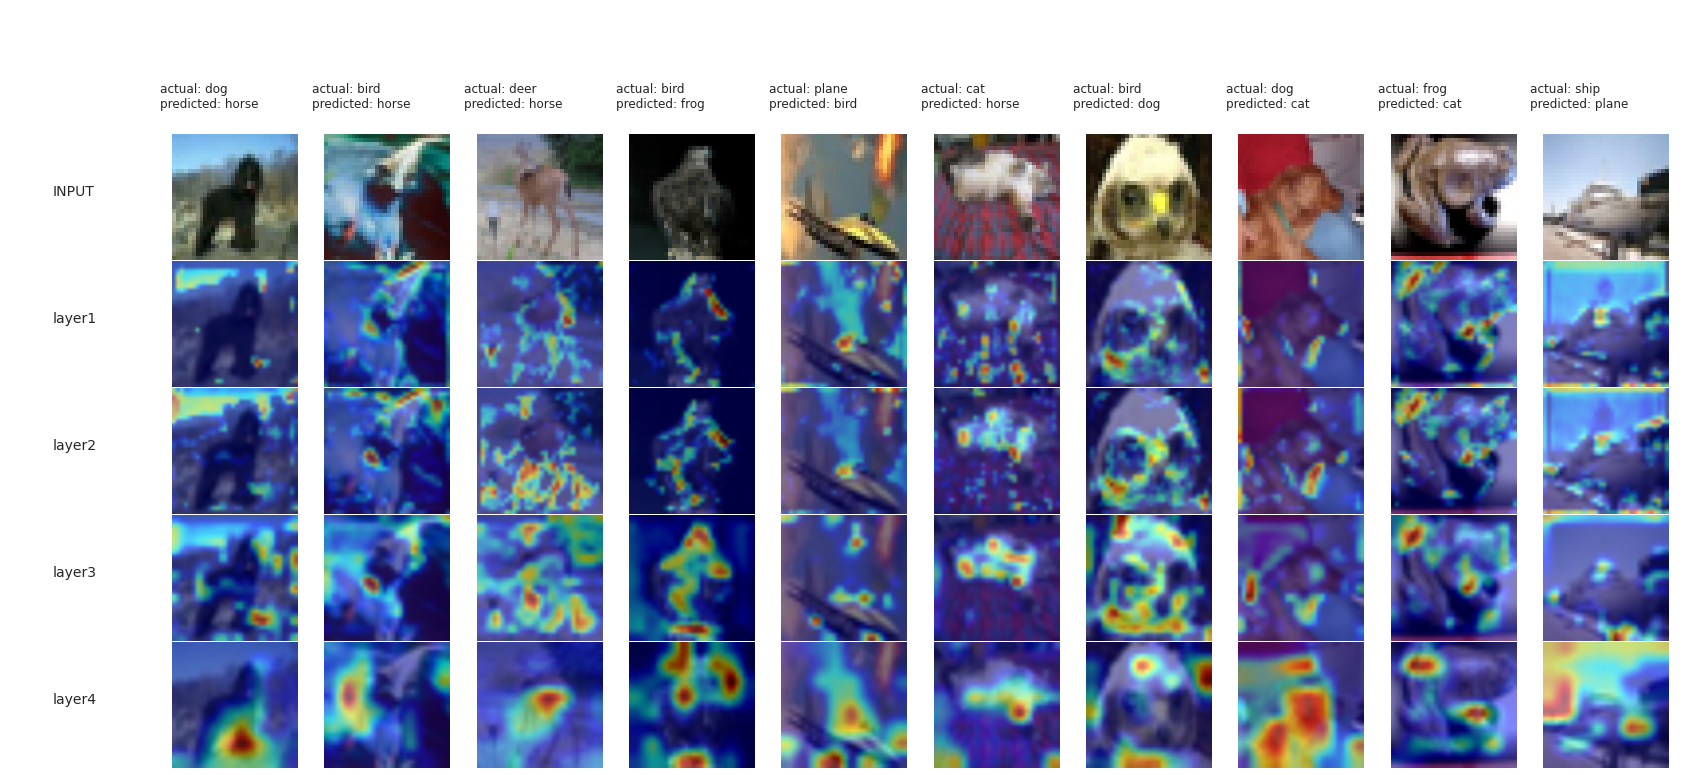

In [18]:
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[10:20], model, target_layers,device)
plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[10:20])